In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
from torchvision.transforms import ToTensor
import torch.optim as optim
import os

# aihwkit
from aihwkit.nn.conversion import convert_to_analog

# customized files
from network import InfModel

In [28]:
from PyTorch_CIFAR10.cifar10_models.resnet import resnet18

In [29]:
# Pretrained model
model = resnet18(pretrained=True)
model.eval() # for evaluation

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [16]:
# test dataset
transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2471, 0.2435, 0.2616))
])

# trainset = dsets.CIFAR10(root='dataset/', train=True,
#                          download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
#                                           shuffle=True, num_workers=2)

testset = dsets.CIFAR10(root='dataset/',
                        train=False,
                        download=True,
                        transform=transform)
batch_size=200
testloader = DataLoader(testset, batch_size=batch_size, shuffle=False)  # , num_workers=2

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [18]:
type(testloader)

torch.utils.data.dataloader.DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


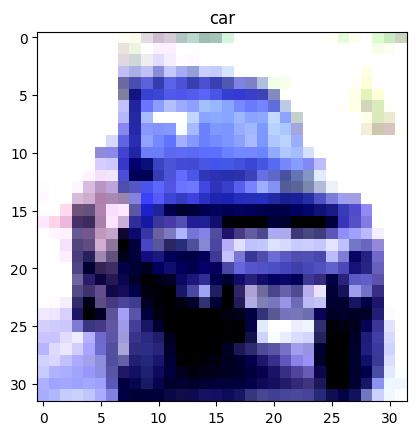

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Fetch a single image
image, label = testset[9]

# Convert the tensor to a numpy array and unnormalize
image = image / 2 + 0.5
np_image = image.numpy()

# Display the image
plt.imshow(np.transpose(np_image, (1, 2, 0)))
plt.title(classes[label])
plt.show()

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [32]:
correct = 0
total = 0

with torch.no_grad():
    model.eval()
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.3f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 93.070 %


In [ ]:
with torch.no_grad():
    test_loss = 0
    total = 0
    correct = 0
    for inputs, targets in testloader:
        inputs = inputs.view(-1, 28*28)  # change size to (batch_size, 784)
        outputs = model_name(inputs)
        test_loss += nn.CrossEntropyLoss()(outputs, targets)

        predict = torch.max(outputs.data, 1)[1]
        total += targets.size(0)
        correct += (predict==targets).sum().item()
    
    test_loss /= len(test_loader)
    test_accuracy = 100* (correct / total)
        
    return test_loss.item(), test_accuracy